<a href="https://colab.research.google.com/github/janjuatest/Public-Sector/blob/main/GDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is about the indentification of various social economic factors that can affect GDP per Capita after PPP of countries. The analysis is not exhaustive

Import the needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Install  and import the World Bank data api


In [2]:
!pip install -U wbdata

In [3]:
import wbdata,datetime

Read the data from Figure 2.1 of World Happiness Report .
Data is avaiable at 
https://happiness-report.s3.amazonaws.com/2020/WHR20_DataForFigure2.1.xls
Helliwell, John F., Richard Layard, Jeffrey Sachs, and Jan-Emmanuel De Neve, eds. 2020. World Happiness Report 2020. New York: Sustainable Development Solutions Network

In [ ]:
happDF=pd.read_excel('happiness.xls')

Renaming the columns so that they are more readable

DeathsTM is main target column which has the Total Covid-19 Deaths per 100,000 population

In [ ]:
happDF=happDF[['Country name','Ladder score']]

We will only take the main Ladder Score from the report.
Higher the ladder score the happier the country

In [ ]:
happDF

,Country name,Ladder score
0,Finland,7.8087
1,Denmark,7.6456
2,Switzerland,7.5599
3,Iceland,7.5045
4,Norway,7.4880
...,...,...
148,Central African Republic,3.4759
149,Rwanda,3.3123
150,Zimbabwe,3.2992
151,South Sudan,2.8166


Sort the dataframe with highest number of deaths per capita

In [ ]:
happDF.columns=['Country','Score']

In [ ]:
happDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  153 non-null    object 
 1   Score    153 non-null    float64
 2   deaths   153 non-null    object 
dtypes: float64(1), object(2)
memory usage: 3.7+ KB


Start from here after uploading and reading happDF

In [4]:
wbdata.get_country("USA")

id    name
----  -------------
USA   United States

In [8]:
countries = [i['id'] for i in wbdata.get_country()] 

List of all countries/regions for which data is avalaible in World Bank data api. The number is 297 because you also have different regions

In [9]:
len(countries)

297

The code below collects the data from the World Bank data api

In [ ]:
data_date = datetime.datetime(2019, 1,1), datetime.datetime(2019, 1, 1)
indicator1={"SP.POP.DPND":"PopDep","IC.BUS.EASE.XQ": "EaseofB","NY.GDP.PCAP.PP.CD":"GDPpppPC","SP.POP.GROW":"PopGrowth","SP.URB.TOTL.IN.ZS":"UrbanPop"}
wbdf1= wbdata.get_dataframe(indicator1, country=countries[0:250], data_date=data_date)
wbdf2=wbdata.get_dataframe(indicator1, country=countries[251:], data_date=data_date)
df1=pd.concat([wbdf1,wbdf2],axis=0)

In [10]:
data_date = datetime.datetime(2019, 1,1), datetime.datetime(2019, 1, 1)
indicator1={"NE.EXP.GNFS.CD":"Exports","BX.KLT.DINV.CD.WD":"FDI","DT.DOD.PVLX.CD":"ForDebt"}#
wbdf1= wbdata.get_dataframe(indicator1, country=countries[0:250], data_date=data_date)
wbdf2=wbdata.get_dataframe(indicator1, country=countries[251:], data_date=data_date)
df2=pd.concat([wbdf1,wbdf2],axis=0)

In [11]:
wbdf

,country,PopDep,EaseofB,GDPpppPC,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,ElecAces,Fem%Lab,Patents,UnemplR,HappScore,EofBScore
0,Aruba,46.367454,NaN,NaN,0.442122,43.546,5.52415,NaN,NaN,75.868000,100.000000,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,82.109775,173.0,2156.419482,2.311817,25.754,4.22836,0.956772,0.2782,63.763000,98.713203,21.247021,NaN,11.06,2.5669,44.06497
2,Angola,95.394042,177.0,6965.511374,3.242983,66.177,NaN,2.733341,NaN,59.925000,43.259258,50.202910,6.0,7.00,NaN,41.28838
3,Albania,46.203522,82.0,14648.267402,-0.426007,61.229,3.96209,1.103581,1.2164,78.194000,100.000000,42.190687,15.0,12.30,4.8827,67.74847
4,Andorra,NaN,NaN,NaN,0.176454,87.984,3.23707,NaN,NaN,NaN,100.000000,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,Kosovo,NaN,57.0,11870.797576,-0.157992,NaN,NaN,0.773671,NaN,71.646341,100.000000,NaN,NaN,NaN,6.3250,73.18473
259,"Yemen, Rep.",72.787716,187.0,NaN,2.300580,37.273,NaN,NaN,NaN,66.087000,62.000000,7.895299,NaN,13.01,3.5200,31.76299
260,South Africa,52.400879,84.0,13034.164661,1.338617,66.856,5.94285,1.075530,0.7997,63.153000,91.229874,45.281073,657.0,26.91,4.8141,67.01897
261,Zambia,87.188180,85.0,3624.024939,2.892373,44.072,3.74792,1.429305,0.1628,62.464000,39.812622,48.295769,11.0,12.01,3.7594,66.93648


In [12]:
wbdf.set_index('country',inplace=True)

In [36]:
wbdf2=pd.concat([wbdf,df1,df2],join='outer',axis=1)

Using the above code you can download the data for each indicator and then combine the dataframes to make a master dataframe that has the data for all the countries. 
This is wbdf above

In [37]:
wbdf2

,PopDep,EaseofB,GDPpppPC,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,ElecAces,Fem%Lab,Patents,UnemplR,HappScore,EofBScore,Exports,FDI,ForDebt,Exports,FDI,ForDebt,FemaleLit
country,,,,,,,,,,,,,,,,,,,,,,
Aruba,46.367454,NaN,NaN,0.442122,43.546,5.52415,NaN,NaN,75.868000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,-7.604174e+07,NaN,NaN,-7.604174e+07,NaN,96.719780
Afghanistan,82.109775,173.0,2156.419482,2.311817,25.754,4.22836,0.956772,0.2782,63.763000,98.713203,21.247021,NaN,11.06,2.5669,44.06497,NaN,2.340455e+07,1.943399e+09,NaN,2.340455e+07,1.943399e+09,NaN
Angola,95.394042,177.0,6965.511374,3.242983,66.177,NaN,2.733341,NaN,59.925000,43.259258,50.202910,6.0,7.00,NaN,41.28838,3.602087e+10,-4.098479e+09,4.052814e+10,3.602087e+10,-4.098479e+09,4.052814e+10,NaN
Albania,46.203522,82.0,14648.267402,-0.426007,61.229,3.96209,1.103581,1.2164,78.194000,100.000000,42.190687,15.0,12.30,4.8827,67.74847,4.821431e+09,1.201022e+09,4.980870e+09,4.821431e+09,1.201022e+09,4.980870e+09,NaN
Andorra,NaN,NaN,NaN,0.176454,87.984,3.23707,NaN,NaN,NaN,100.000000,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,57.0,11870.797576,-0.157992,NaN,NaN,0.773671,NaN,71.646341,100.000000,NaN,NaN,NaN,6.3250,73.18473,2.315662e+09,2.850816e+08,4.838109e+08,2.315662e+09,2.850816e+08,4.838109e+08,NaN
"Yemen, Rep.",72.787716,187.0,NaN,2.300580,37.273,NaN,NaN,NaN,66.087000,62.000000,7.895299,NaN,13.01,3.5200,31.76299,NaN,-3.709828e+08,5.622578e+09,NaN,-3.709828e+08,5.622578e+09,NaN
South Africa,52.400879,84.0,13034.164661,1.338617,66.856,5.94285,1.075530,0.7997,63.153000,91.229874,45.281073,657.0,26.91,4.8141,67.01897,1.049158e+11,4.624503e+09,7.610179e+10,1.049158e+11,4.624503e+09,7.610179e+10,91.713989


Lets get data for one more indicator i.e. Female Literacy Rate and then combine it into our master dataframe wbdf

In [32]:
data_date = datetime.datetime(2010, 1,1), datetime.datetime(2010, 1, 1)
indicator1={"SE.ADT.LITR.FE.ZS":"FemaleLit"}
wbdf1= wbdata.get_dataframe(indicator1, country=countries[0:250], data_date=data_date)
wbdf2=wbdata.get_dataframe(indicator1, country=countries[251:], data_date=data_date)
df2=pd.concat([wbdf1,wbdf2],axis=0)

In [33]:
df2.notna().sum()

FemaleLit    92
dtype: int64

We only have data from 92 countries for female literacy and that too is also quite old (2010) so lets drop the variable

In [20]:
wbdf=pd.concat([wbdf,df2],join='outer',axis=1)

,PopDep,EaseofB,GDPpppPC,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,ElecAces,Fem%Lab,Patents,UnemplR,HappScore,EofBScore,Exports,FDI,ForDebt,FemaleLit,FemaleLit
country,,,,,,,,,,,,,,,,,,,,
Aruba,46.367454,NaN,NaN,0.442122,43.546,5.52415,NaN,NaN,75.868000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,-7.604174e+07,NaN,NaN,NaN
Afghanistan,82.109775,173.0,2156.419482,2.311817,25.754,4.22836,0.956772,0.2782,63.763000,98.713203,21.247021,NaN,11.06,2.5669,44.06497,NaN,2.340455e+07,1.943399e+09,NaN,NaN
Angola,95.394042,177.0,6965.511374,3.242983,66.177,NaN,2.733341,NaN,59.925000,43.259258,50.202910,6.0,7.00,NaN,41.28838,3.602087e+10,-4.098479e+09,4.052814e+10,NaN,NaN
Albania,46.203522,82.0,14648.267402,-0.426007,61.229,3.96209,1.103581,1.2164,78.194000,100.000000,42.190687,15.0,12.30,4.8827,67.74847,4.821431e+09,1.201022e+09,4.980870e+09,NaN,NaN
Andorra,NaN,NaN,NaN,0.176454,87.984,3.23707,NaN,NaN,NaN,100.000000,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,57.0,11870.797576,-0.157992,NaN,NaN,0.773671,NaN,71.646341,100.000000,NaN,NaN,NaN,6.3250,73.18473,2.315662e+09,2.850816e+08,4.838109e+08,NaN,NaN
"Yemen, Rep.",72.787716,187.0,NaN,2.300580,37.273,NaN,NaN,NaN,66.087000,62.000000,7.895299,NaN,13.01,3.5200,31.76299,NaN,-3.709828e+08,5.622578e+09,NaN,NaN
South Africa,52.400879,84.0,13034.164661,1.338617,66.856,5.94285,1.075530,0.7997,63.153000,91.229874,45.281073,657.0,26.91,4.8141,67.01897,1.049158e+11,4.624503e+09,7.610179e+10,NaN,86.458633


In [35]:
wbdf.drop(columns=['FemaleLit'],axis=1,inplace=True)

In [38]:
wbdf

,PopDep,EaseofB,GDPpppPC,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,ElecAces,Fem%Lab,Patents,UnemplR,HappScore,EofBScore,Exports,FDI,ForDebt
country,,,,,,,,,,,,,,,,,,
Aruba,46.367454,NaN,NaN,0.442122,43.546,5.52415,NaN,NaN,75.868000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,-7.604174e+07,NaN
Afghanistan,82.109775,173.0,2156.419482,2.311817,25.754,4.22836,0.956772,0.2782,63.763000,98.713203,21.247021,NaN,11.06,2.5669,44.06497,NaN,2.340455e+07,1.943399e+09
Angola,95.394042,177.0,6965.511374,3.242983,66.177,NaN,2.733341,NaN,59.925000,43.259258,50.202910,6.0,7.00,NaN,41.28838,3.602087e+10,-4.098479e+09,4.052814e+10
Albania,46.203522,82.0,14648.267402,-0.426007,61.229,3.96209,1.103581,1.2164,78.194000,100.000000,42.190687,15.0,12.30,4.8827,67.74847,4.821431e+09,1.201022e+09,4.980870e+09
Andorra,NaN,NaN,NaN,0.176454,87.984,3.23707,NaN,NaN,NaN,100.000000,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,57.0,11870.797576,-0.157992,NaN,NaN,0.773671,NaN,71.646341,100.000000,NaN,NaN,NaN,6.3250,73.18473,2.315662e+09,2.850816e+08,4.838109e+08
"Yemen, Rep.",72.787716,187.0,NaN,2.300580,37.273,NaN,NaN,NaN,66.087000,62.000000,7.895299,NaN,13.01,3.5200,31.76299,NaN,-3.709828e+08,5.622578e+09
South Africa,52.400879,84.0,13034.164661,1.338617,66.856,5.94285,1.075530,0.7997,63.153000,91.229874,45.281073,657.0,26.91,4.8141,67.01897,1.049158e+11,4.624503e+09,7.610179e+10


There are several null values in the data that may not be considered

In [ ]:
wbdf.reset_index(inplace=True)

In [ ]:
wbdf.drop('index',axis=1,inplace=True)

In [44]:
wbdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, Aruba to Zimbabwe
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PopDep       238 non-null    float64
 1   EaseofB      188 non-null    float64
 2   GDPpppPC     231 non-null    float64
 3   PopGrowth    261 non-null    float64
 4   UrbanPop     259 non-null    float64
 5   GexpEdu      141 non-null    float64
 6   MilExpGdp    192 non-null    float64
 7   HosBedP1000  112 non-null    float64
 8   LifeExp      246 non-null    float64
 9   ElecAces     260 non-null    float64
 10  Fem%Lab      232 non-null    float64
 11  Patents      151 non-null    float64
 12  UnemplR      232 non-null    float64
 13  HappScore    147 non-null    float64
 14  EofBScore    235 non-null    float64
 15  Exports      197 non-null    float64
 16  FDI          242 non-null    float64
 17  ForDebt      131 non-null    float64
dtypes: float64(18)
memory usage: 49.0+ KB


Lets look at the columns, they are all numeric and the stats of the columns are given below

In [45]:
wbdf.describe()

,PopDep,EaseofB,GDPpppPC,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,ElecAces,Fem%Lab,Patents,UnemplR,HappScore,EofBScore,Exports,FDI,ForDebt
count,238.000000,188.000000,231.000000,261.000000,259.000000,141.000000,192.000000,112.000000,246.000000,260.000000,232.000000,1.510000e+02,232.000000,147.000000,235.000000,1.970000e+02,2.420000e+02,1.310000e+02
mean,58.788051,96.239362,21844.682252,1.211838,60.399617,4.399784,1.940191,1.941442,72.058077,86.045031,40.906096,1.412285e+05,7.007797,5.477193,62.540146,1.024571e+12,5.353613e+10,1.241614e+11
std,15.586271,54.799695,22374.104184,1.056053,22.788811,1.327613,1.545404,1.629764,7.490438,23.293025,9.149095,4.214469e+05,4.916085,1.122692,13.102921,3.051465e+12,1.755307e+11,4.598702e+11
min,17.812083,1.000000,784.926989,-1.805226,13.250000,1.370930,0.000000,0.012800,51.593000,11.024252,7.895299,1.000000e+00,0.110000,2.566900,20.039580,2.360177e+07,-4.663323e+10,8.307576e+07
25%,48.991630,49.750000,5435.141540,0.456356,42.236500,3.419300,1.113182,0.435225,67.249000,82.055481,38.833187,3.400000e+01,3.827500,4.726700,54.248063,6.079488e+09,2.134498e+08,1.775009e+09
50%,54.683418,96.500000,14289.960502,1.127924,61.229000,4.421020,1.532019,1.848600,73.362479,99.997504,43.724598,4.700000e+02,5.590000,5.539900,61.350780,4.497355e+10,1.505959e+09,7.553373e+09
75%,68.070138,143.250000,30532.294889,1.951209,80.234500,5.207540,2.239086,3.199200,77.393963,100.000000,46.709541,8.134500e+03,8.948901,6.221400,73.441609,4.362693e+11,1.665722e+10,3.253276e+10
max,110.255774,190.000000,129451.063933,4.469239,100.000000,8.051940,12.034846,7.954100,84.226829,100.000000,55.956589,2.294881e+06,26.910000,7.808700,86.764650,2.488971e+13,1.630976e+12,3.275542e+12


The code below will copy the happiness score from the World Happiness Index Report for each country into the master dataframe



In [46]:
wbdf.columns

Index(['PopDep', 'EaseofB', 'GDPpppPC', 'PopGrowth', 'UrbanPop', 'GexpEdu',
       'MilExpGdp', 'HosBedP1000', 'LifeExp', 'ElecAces', 'Fem%Lab', 'Patents',
       'UnemplR', 'HappScore', 'EofBScore', 'Exports', 'FDI', 'ForDebt'],
      dtype='object')

Lets rename the columns so that they are more readable

In [47]:
wbdf.columns=['Population Dependence %', 'Ease of Doing Business Ranking', 'GDP per Capita (PPP)', 'Population Growth Rate', 'Urban Population (% of Total)', 'GexpEdu',
       'MilExpGdp', 'HosBedP1000', 'Life Expectancy', 'Elecricty Access', 'Fem%Lab', 'Patents',
       'UnemplR', 'World Happiness Report Score', 'Ease of Business Score', 'Total Exports ($)', 'Foreign Direct Investment', 'Total Foreign Debt($)']

In [ ]:
for i in happDF.index:
  score=happDF.iloc[i]['Score']
  country=happDF['Country'][i]
  wbdf.loc[wbdf['country']==country,'HappScore']=score
  if ((wbdf['country']==country).sum()==0):
    print(country)
  #print(dfwho['Country'][i],deathsTM)

Taiwan Province of China
Slovenia
Slovakia
South Korea
Russia
Kyrgyzstan
North Cyprus
Hong Kong S.A.R. of China
Ivory Coast
Congo (Brazzaville)
Macedonia
Venezuela
Laos
Gambia
Iran
Palestinian Territories
Congo (Kinshasa)
Swaziland
Egypt
Yemen


The list above identifies countries with different names in the World Bank database and Happiness report. The data for these countries has to be filled manually as below

In [ ]:
wbdf[wbdf['country'].str.contains("Yemen")]


,country,PopDep,EaseofB,GDPpppPC,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,ElecAces,Fem%Lab,Patents,UnemplR,HappScore
259,"Yemen, Rep.",72.787716,187.0,NaN,2.30058,37.273,NaN,NaN,NaN,66.087,62.0,7.895299,NaN,13.01,NaN


In [ ]:
wbdf.loc[wbdf['country'].str.contains("Yemen"),'HappScore']=3.52

In [ ]:
happDF[happDF['Country'].str.contains("Yemen")]

,Country,Score,deaths
145,Yemen,3.5274,20.65


The above three lines manually fills the data 
for countries with different names in the two databases
Note: The above only shows one example. This was done for all countries in the list above

In [41]:
wbdf[wbdf['HappScore'].isnull() | wbdf['EaseofB'].isnull()]

,PopDep,EaseofB,GDPpppPC,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,ElecAces,Fem%Lab,Patents,UnemplR,HappScore,EofBScore,Exports,FDI,ForDebt
country,,,,,,,,,,,,,,,,,,
Aruba,46.367454,NaN,NaN,0.442122,43.546000,5.52415,NaN,NaN,75.868000,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,-7.604174e+07,NaN
Angola,95.394042,177.0,6965.511374,3.242983,66.177000,NaN,2.733341,NaN,59.925000,43.259258,50.202910,6.0,7.000000,NaN,41.288380,3.602087e+10,-4.098479e+09,4.052814e+10
Andorra,NaN,NaN,NaN,0.176454,87.984000,3.23707,NaN,NaN,NaN,100.000000,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Arab World,61.081801,NaN,15256.338996,1.924693,59.201647,NaN,6.152311,NaN,71.436497,89.286856,20.368759,3807.0,10.256798,NaN,56.543224,1.273419e+12,3.350713e+10,NaN
American Samoa,NaN,NaN,NaN,-0.276231,87.147000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
British Virgin Islands,NaN,NaN,NaN,0.762138,48.116000,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,NaN,NaN,NaN,NaN,5.799684e+10,NaN
Virgin Islands (U.S.),64.930706,NaN,NaN,-0.323958,95.832000,NaN,NaN,NaN,79.268293,100.000000,49.115615,NaN,7.990000,NaN,NaN,NaN,NaN,NaN
Vanuatu,73.390305,107.0,3292.544065,2.430920,25.394000,NaN,NaN,0.1653,70.021000,61.864769,43.577945,NaN,1.720000,NaN,61.051910,NaN,4.100000e+07,2.658513e+08


Lets look at the data for one country Pakistan

In [42]:
wbdf.loc['Pakistan']

PopDep         6.495331e+01
EaseofB        1.080000e+02
GDPpppPC       4.898051e+03
PopGrowth      2.029215e+00
UrbanPop       3.690700e+01
GexpEdu        3.002920e+00
MilExpGdp      3.594750e+00
HosBedP1000    9.620000e-01
LifeExp        6.677000e+01
ElecAces       7.109155e+01
Fem%Lab        2.013498e+01
Patents        3.060000e+02
UnemplR        4.080000e+00
HappScore      5.693300e+00
EofBScore      6.095491e+01
Exports        2.815332e+10
FDI            2.218000e+09
ForDebt        7.223150e+10
Name: Pakistan, dtype: float64

The heatmap below shows the correlation of variables with each other

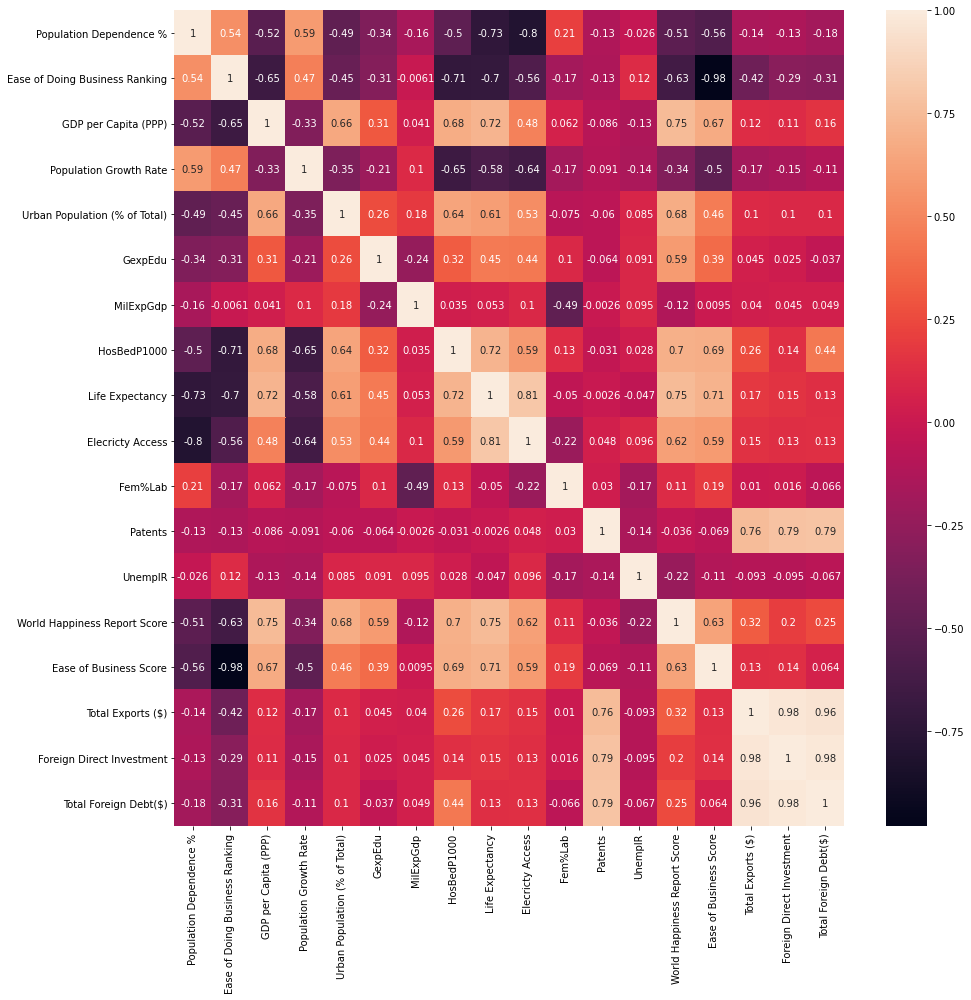

In [50]:
plt.figure(figsize=(15,15))
sns.heatmap(wbdf.corr(),annot=True)

The heatmap shows that some variables are not correlated with GDP so may be dropped e.g. Military Expenditure as % of GDP, patents, Female Labor Particpate rate. These variables will be dropped

In [51]:
wbdf.columns

Index(['Population Dependence %', 'Ease of Doing Business Ranking',
       'GDP per Capita (PPP)', 'Population Growth Rate',
       'Urban Population (% of Total)', 'GexpEdu', 'MilExpGdp', 'HosBedP1000',
       'Life Expectancy', 'Elecricty Access', 'Fem%Lab', 'Patents', 'UnemplR',
       'World Happiness Report Score', 'Ease of Business Score',
       'Total Exports ($)', 'Foreign Direct Investment',
       'Total Foreign Debt($)'],
      dtype='object')

In [63]:
wbdfSmall=wbdf.drop(columns=['GexpEdu', 'MilExpGdp', 'HosBedP1000','Fem%Lab','Fem%Lab','UnemplR','Patents'])

In [64]:
wbdfSmall

,Population Dependence %,Ease of Doing Business Ranking,GDP per Capita (PPP),Population Growth Rate,Urban Population (% of Total),Life Expectancy,Elecricty Access,World Happiness Report Score,Ease of Business Score,Total Exports ($),Foreign Direct Investment,Total Foreign Debt($)
country,,,,,,,,,,,,
Aruba,46.367454,NaN,NaN,0.442122,43.546,75.868000,100.000000,NaN,NaN,NaN,-7.604174e+07,NaN
Afghanistan,82.109775,173.0,2156.419482,2.311817,25.754,63.763000,98.713203,2.5669,44.06497,NaN,2.340455e+07,1.943399e+09
Angola,95.394042,177.0,6965.511374,3.242983,66.177,59.925000,43.259258,NaN,41.28838,3.602087e+10,-4.098479e+09,4.052814e+10
Albania,46.203522,82.0,14648.267402,-0.426007,61.229,78.194000,100.000000,4.8827,67.74847,4.821431e+09,1.201022e+09,4.980870e+09
Andorra,NaN,NaN,NaN,0.176454,87.984,NaN,100.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,57.0,11870.797576,-0.157992,NaN,71.646341,100.000000,6.3250,73.18473,2.315662e+09,2.850816e+08,4.838109e+08
"Yemen, Rep.",72.787716,187.0,NaN,2.300580,37.273,66.087000,62.000000,3.5200,31.76299,NaN,-3.709828e+08,5.622578e+09
South Africa,52.400879,84.0,13034.164661,1.338617,66.856,63.153000,91.229874,4.8141,67.01897,1.049158e+11,4.624503e+09,7.610179e+10


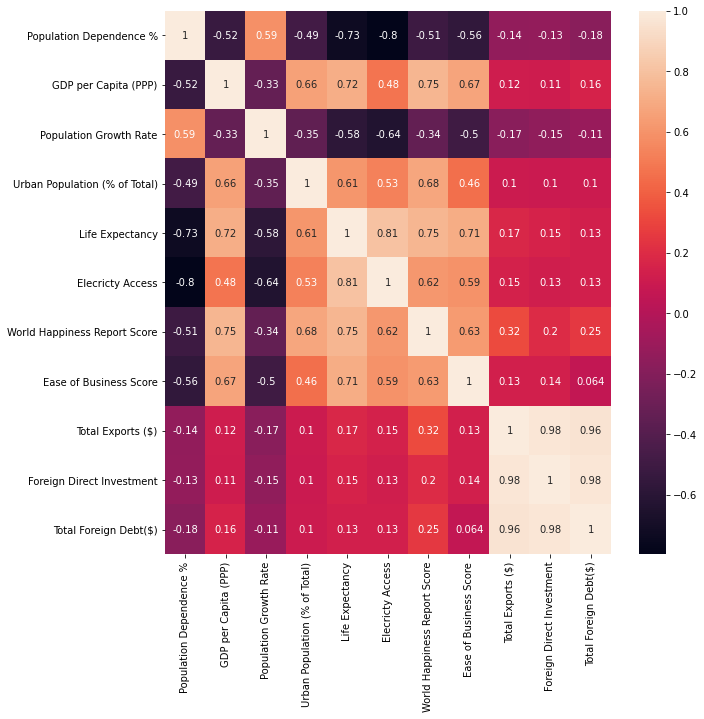

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(wbdfSmall.corr(),annot=True)

In [ ]:
wbdfSmall

In [65]:
wbdfSmall.isnull().sum()

Population Dependence %            25
Ease of Doing Business Ranking     75
GDP per Capita (PPP)               32
Population Growth Rate              2
Urban Population (% of Total)       4
Life Expectancy                    17
Elecricty Access                    3
World Happiness Report Score      116
Ease of Business Score             28
Total Exports ($)                  66
Foreign Direct Investment          21
Total Foreign Debt($)             132
dtype: int64

In [67]:
df=wbdfSmall[wbdfSmall['Ease of Doing Business Ranking'].notna()]

df above is the dataframe we will use since it contains data for 188 countries and not regions

In [68]:
df

,Population Dependence %,Ease of Doing Business Ranking,GDP per Capita (PPP),Population Growth Rate,Urban Population (% of Total),Life Expectancy,Elecricty Access,World Happiness Report Score,Ease of Business Score,Total Exports ($),Foreign Direct Investment,Total Foreign Debt($)
country,,,,,,,,,,,,
Afghanistan,82.109775,173.0,2156.419482,2.311817,25.754,63.763000,98.713203,2.5669,44.06497,NaN,2.340455e+07,1.943399e+09
Angola,95.394042,177.0,6965.511374,3.242983,66.177,59.925000,43.259258,NaN,41.28838,3.602087e+10,-4.098479e+09,4.052814e+10
Albania,46.203522,82.0,14648.267402,-0.426007,61.229,78.194000,100.000000,4.8827,67.74847,4.821431e+09,1.201022e+09,4.980870e+09
United Arab Emirates,18.862478,16.0,70089.324038,1.438780,86.789,77.470000,100.000000,6.7908,80.91489,3.893724e+11,1.378747e+10,NaN
Argentina,55.857033,126.0,23040.287953,0.993397,91.991,76.221000,100.000000,5.9747,58.96151,7.768432e+10,6.663062e+09,2.146662e+11
...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,NaN,57.0,11870.797576,-0.157992,NaN,71.646341,100.000000,6.3250,73.18473,2.315662e+09,2.850816e+08,4.838109e+08
"Yemen, Rep.",72.787716,187.0,NaN,2.300580,37.273,66.087000,62.000000,3.5200,31.76299,NaN,-3.709828e+08,5.622578e+09
South Africa,52.400879,84.0,13034.164661,1.338617,66.856,63.153000,91.229874,4.8141,67.01897,1.049158e+11,4.624503e+09,7.610179e+10


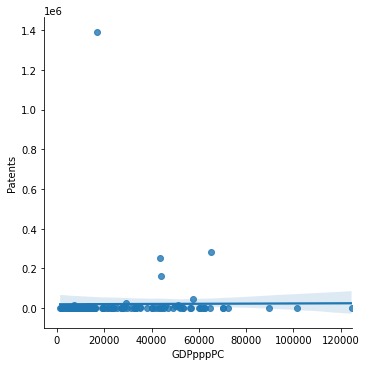

In [ ]:
sns.lmplot(data=easeDF,x='GDPpppPC',y='Patents')

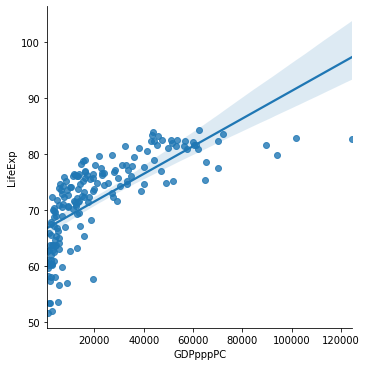

In [ ]:
sns.lmplot(data=easeDF,x='GDPpppPC',y='LifeExp')

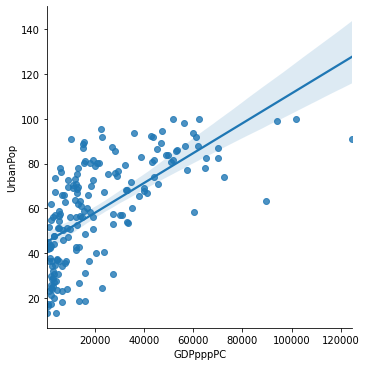

In [ ]:
sns.lmplot(data=easeDF,x='GDPpppPC',y='UrbanPop')

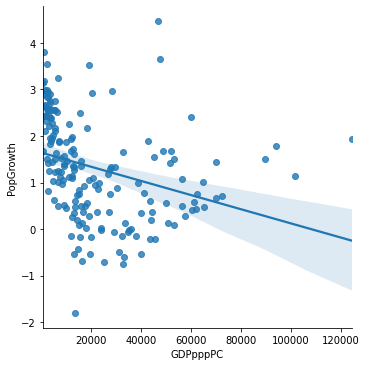

In [ ]:
sns.lmplot(data=easeDF,x='GDPpppPC',y='PopGrowth')

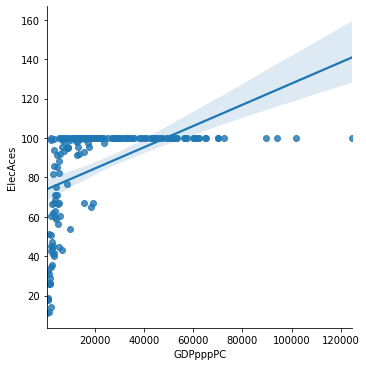

In [ ]:
sns.lmplot(data=easeDF,x='GDPpppPC',y='ElecAces')

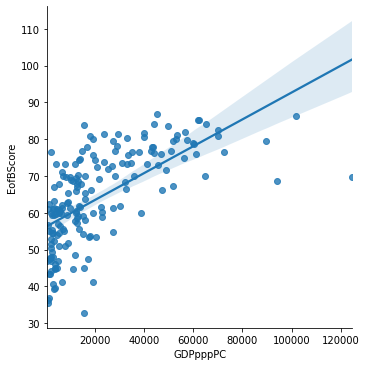

In [ ]:
sns.lmplot(data=easeDF,x='GDPpppPC',y='EofBScore')

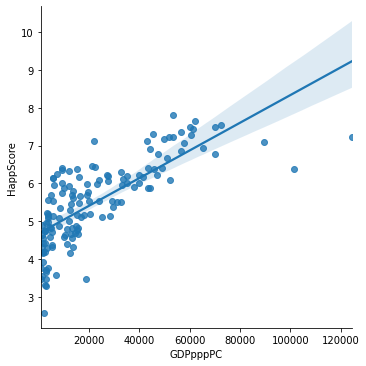

In [ ]:
sns.lmplot(data=easeDF,x='GDPpppPC',y='HappScore')

In [ ]:
#easeDF.fillna(easeDF.mean(),inplace=True)

In [55]:
from google.colab import files

In [56]:
wbdf.to_csv('wbdf.csv')

In [57]:
files.download('wbdf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
dfWbWho.head()

,Unnamed: 0,country,PopDep,EaseofB,GDPpppPC,DiabetesPrev,PopGrowth,UrbanPop,GexpEdu,MilExpGdp,HosBedP1000,LifeExp,deaths
0,0,Aruba,46.367454,NaN,NaN,11.6,0.442122,43.546,5.52415,NaN,NaN,75.868,571.34
1,1,Afghanistan,82.109775,173.0,2156.419482,9.2,2.311817,25.754,4.22836,0.956772,0.2782,63.763,61.91
2,2,Angola,95.394042,177.0,6965.511374,4.5,3.242983,66.177,NaN,2.733341,NaN,59.925,14.45
3,3,Albania,46.203522,82.0,14496.127683,9.0,-0.426007,61.229,3.96209,1.103581,1.2164,78.194,502.47
4,4,Andorra,NaN,NaN,NaN,7.7,0.176454,87.984,3.23707,NaN,NaN,NaN,1358.96


In [ ]:
dfWbWho.sort_values("EaseofB")[['country','EaseofB','deaths']].head(30)

,country,EaseofB,deaths
131,New Zealand,1.0,5.18
150,Singapore,2.0,4.96
49,Denmark,4.0,382.41
95,"Korea, Rep.",5.0,28.69
176,United States,6.0,1376.83
64,Georgia,7.0,822.98
63,United Kingdom,8.0,1651.18
129,Norway,9.0,107.36
160,Sweden,10.0,1199.59
104,Lithuania,11.0,1078.87


In [ ]:
dfWbWho.corrwith(dfWbWho['deaths'],axis=0,method='kendall')

Unnamed: 0     -0.073088
PopDep         -0.229435
EaseofB        -0.315521
GDPpppPC        0.385542
DiabetesPrev    0.099927
PopGrowth      -0.369042
UrbanPop        0.323320
GexpEdu         0.148296
MilExpGdp      -0.022986
HosBedP1000     0.458290
LifeExp         0.408927
deaths          1.000000
dtype: float64

In [ ]:
dfWbWho.corrwith(dfWbWho['deaths'],axis=0,method='pearson')

Unnamed: 0     -0.108665
PopDep         -0.302671
EaseofB        -0.436250
GDPpppPC        0.355147
DiabetesPrev   -0.020298
PopGrowth      -0.480993
UrbanPop        0.398103
GexpEdu         0.187636
MilExpGdp      -0.104677
HosBedP1000     0.519770
LifeExp         0.506314
deaths          1.000000
dtype: float64

In [ ]:
dfWbWho.corrwith(dfWbWho['deaths'],axis=0,method='spearman')

Unnamed: 0     -0.107584
PopDep         -0.334360
EaseofB        -0.448218
GDPpppPC        0.540650
DiabetesPrev    0.158798
PopGrowth      -0.521502
UrbanPop        0.478636
GexpEdu         0.222906
MilExpGdp      -0.036911
HosBedP1000     0.635495
LifeExp         0.568403
deaths          1.000000
dtype: float64

The Correlations of Covid-19 deaths per 100,000 population with various indicators

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

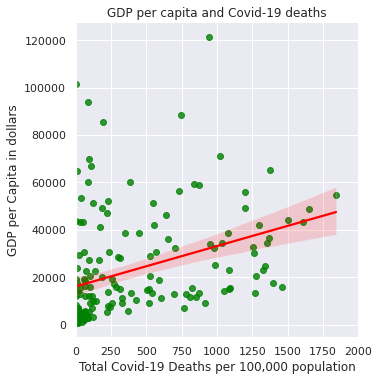

In [ ]:
sns.set(style = "darkgrid")
lm=sns.lmplot(data=dfWbWho,y='GDPpppPC',x='deaths',scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('GDP per capita and Covid-19 deaths')
# Set x-axis label
plt.xlabel('Total Covid-19 Deaths per 100,000 population')
# Set y-axis label
plt.ylabel('GDP per Capita in dollars')
axes=lm.axes
axes[0,0].set_xlim(0,2000)
lm.savefig("output2.png")
files.download("output2.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

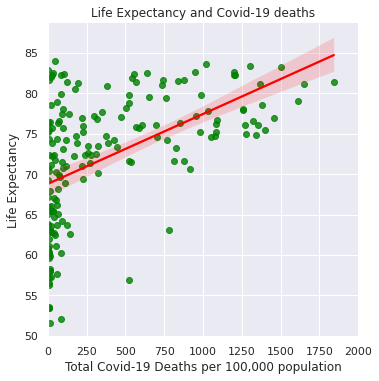

In [ ]:
sns.set(style = "darkgrid")
lm=sns.lmplot(data=dfWbWho,y='LifeExp',x='deaths',scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('Life Expectancy and Covid-19 deaths')
# Set x-axis label
plt.xlabel('Total Covid-19 Deaths per 100,000 population')
# Set y-axis label
plt.ylabel('Life Expectancy')
axes=lm.axes
axes[0,0].set_xlim(0,2000)
lm.savefig("output1.png")
files.download("output1.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

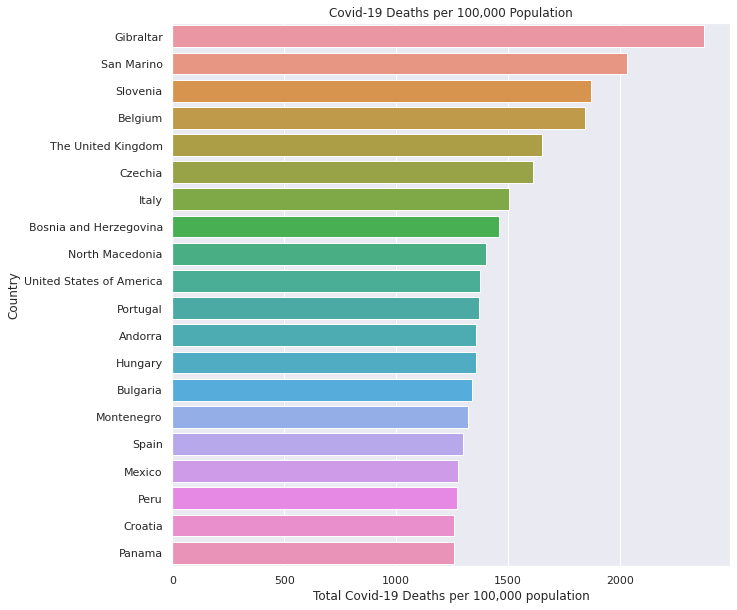

In [ ]:
sns.set(style = "darkgrid")
plt.tight_layout()
plt.figure(figsize=(10,10))
sns.set(font_scale=1)
plot=sns.barplot(data=dfwhoSorted.head(20),y='Country',x='DeathsTM')
plt.title('Covid-19 Deaths per 100,000 Population')
# Set x-axis label
plt.xlabel('Total Covid-19 Deaths per 100,000 population')
# Set y-axis label
plt.ylabel('Country')
plot.figure.savefig("output3.png",bbox_inches='tight')
files.download("output3.png")



In [ ]:
len(dfWbWho)

187

In [ ]:
dfWbWho.isnull().sum()

Unnamed: 0       0
country          0
PopDep          13
EaseofB         14
GDPpppPC        19
DiabetesPrev     4
PopGrowth        1
UrbanPop         2
GexpEdu         84
MilExpGdp       39
HosBedP1000     79
LifeExp          8
deaths           0
dtype: int64

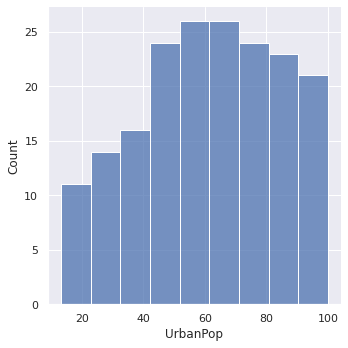

In [ ]:
sns.displot(x=dfWbWho['UrbanPop'])